In [1]:
#pip install ace_tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from folium.plugins import HeatMap

In [3]:
accident = pd.read_csv('../data/Traffic_Accident.csv')

In [4]:
accident.drop(columns=["x", "y"], inplace=True)

In [5]:
accident.head(5)
#from IPython.display import display
display(accident)

Accident Number    Date and Time  Number of Motor Vehicles  \
0           20170018222    1/7/2017 3:10                       2.0   
1           20170018236    1/7/2017 3:00                       1.0   
2           20170018257    1/7/2017 2:35                       2.0   
3           20170018294    1/7/2017 3:28                       1.0   
4           20170018301    1/7/2017 3:40                       1.0   
...                 ...              ...                       ...   
245281      20240777562   12/5/2024 8:40                       2.0   
245282      20240777640   12/5/2024 9:35                       2.0   
245283      20240777735  12/5/2024 11:42                       2.0   
245284      20240777766  12/5/2024 12:04                       2.0   
245285      20240777857  12/5/2024 11:50                       2.0   

        Number of Injuries  Number of Fatalities Property Damage Hit and Run  \
0                      1.0                   0.0             NaN           N   
1                      0.0                   0.0             NaN           N   
2                      0.0                   0.0             NaN           Y   
3                      0.0                   0.0             NaN           N   
4                      1.0                   0.0             NaN           N   
...                    ...                   ...             ...         ...   
245281                 0.0                   0.0             NaN           N   
245282                 2.0                   0.0             NaN           Y   
245283                 2.0                   0.0             NaN           N   
245284                 1.0                   0.0             NaN           N   
245285                 0.0                   0.0             NaN           Y   

                     Collision Type Description Weather Description  \
0                                         ANGLE               CLEAR   
1       NOT COLLISION W/MOTOR VEHICLE-TRANSPORT                SNOW   
2                                         ANGLE                SNOW   
3       NOT COLLISION W/MOTOR VEHICLE-TRANSPORT               CLEAR   
4       NOT COLLISION W/MOTOR VEHICLE-TRANSPORT              CLOUDY   
...                                         ...                 ...   
245281                                    ANGLE               CLEAR   
245282                                    ANGLE               CLEAR   
245283                                    ANGLE               CLEAR   
245284               SIDESWIPE - SAME DIRECTION               CLEAR   
245285                            Front to Rear               CLEAR   

       Illumination Description  ...      Long HarmfulCodes  \
0                DARK - LIGHTED  ... -86.75166           12   
1                DARK - LIGHTED  ... -86.74199           24   
2                DARK - LIGHTED  ... -86.71342        14;55   
3                DARK - LIGHTED  ... -86.76087           34   
4                DARK - LIGHTED  ... -86.74988        36;63   
...                         ...  ...       ...          ...   
245281           DARK - LIGHTED  ... -86.78068           12   
245282           DARK - LIGHTED  ... -86.71041        12;13   
245283       DARK - NOT LIGHTED  ... -86.64710           12   
245284                 DAYLIGHT  ... -86.78257           12   
245285    Dark-Unknown Lighting  ... -86.60696           12   

                                      HarmfulDescriptions ObjectId  Zip Code  \
0                              MOTOR VEHICLE IN TRANSPORT        1   37210.0   
1                                          GUARDRAIL FACE        2   37115.0   
2       PARKED MOTOR VEHICLE;Motor Vehicle-In-Motion O...        3   37115.0   
3                                                   DITCH        4   37210.0   
4             CONCRETE TRAFFIC BARRIER;Ran Off Road-Right        5   37115.0   
...                                                   ...      ...       ...   
245281                         MOTOR

In [6]:
accident.dtypes

Accident Number                 int64
Date and Time                  object
Number of Motor Vehicles      float64
Number of Injuries            float64
Number of Fatalities          float64
Property Damage                object
Hit and Run                    object
Collision Type Description     object
Weather Description            object
Illumination Description       object
Street Address                 object
City                           object
State                          object
Precinct                       object
Lat                           float64
Long                          float64
HarmfulCodes                   object
HarmfulDescriptions            object
ObjectId                        int64
Zip Code                      float64
RPA                           float64
Weather                       float64
IlluACCIDEmination            float64
Collision Type                float64
Reporting Officer             float64
dtype: object

In [7]:

day_conditions = ['DAYLIGHT', 'DAWN', 'DUSK']
night_conditions = ['DARK - LIGHTED', 'DARK - NOT LIGHTED', 'Dark-Unknown Lighting']
accident['Day/Night'] = accident['Illumination Description'].apply(
    lambda x: 'Day' if x in day_conditions else ('Night' if x in night_conditions else 'Not Reported')
)


accident_counts = accident['Day/Night'].value_counts()




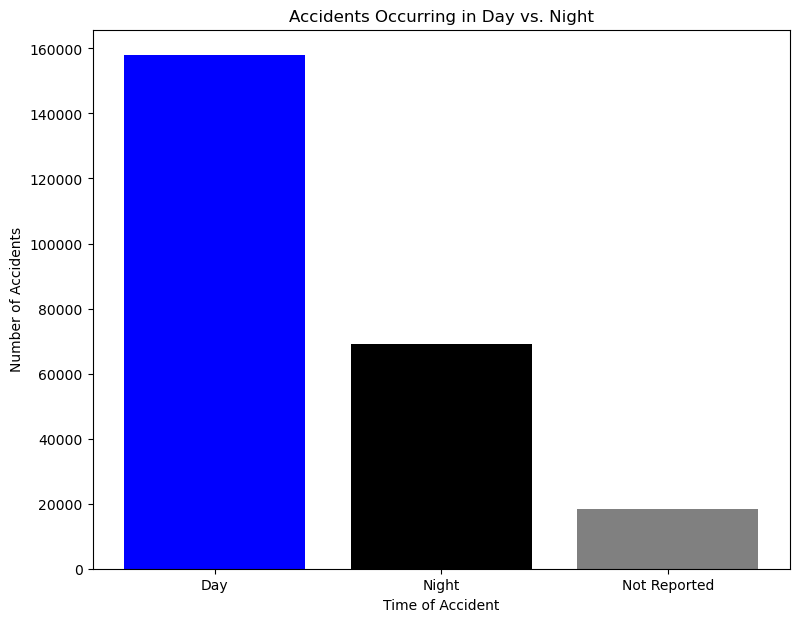

In [8]:
plt.figure(figsize=(9, 7))
plt.bar(accident_counts.index, accident_counts.values, color=['blue', 'black', 'gray'])
plt.xlabel("Time of Accident")
plt.ylabel("Number of Accidents")
plt.title("Accidents Occurring in Day vs. Night")
plt.show()

df_filtered = accident[(accident["Number of Injuries"] > 0) | (accident["Number of Fatalities"] > 0)].copy()


df_filtered["Lat"] = pd.to_numeric(df_filtered["Lat"], errors='coerce')
df_filtered["Long"] = pd.to_numeric(df_filtered["Long"], errors='coerce')


df_filtered = df_filtered.dropna(subset=["Lat", "Long"])


m = folium.Map(location=[35.5175, -86.5804], zoom_start=7)  # Tennessee coordinates


for index, row in df_filtered.iterrows():
    folium.Marker(
        location=[row["Long"], row["Lat"]],
        popup=f"Injuries: {row['Number of Injuries']} | Fatalities: {row['Number of Fatalities']}",
        icon=folium.Icon(color="red" if row["Number of Fatalities"] > 0 else "orange")
    ).add_to(m)
m    

In [15]:
nashville_zip_codes = [
    37201, 37202, 37203, 37204, 37205, 37206, 37207, 37208, 37209, 37210,
    37211, 37212, 37213, 37214, 37215, 37216, 37217, 37218, 37219, 37220,
    37221, 37228, 37232, 37240
]


accident["Zip Code"] = pd.to_numeric(accident["Zip Code"], errors='coerce')


df_nashville = accident[accident["Zip Code"].isin(nashville_zip_codes)].copy()



df_nashville.head()




Accident Number  Date and Time  Number of Motor Vehicles  \
0      20170018222  1/7/2017 3:10                       2.0   
3      20170018294  1/7/2017 3:28                       1.0   
5      20170018409  1/7/2017 4:34                       1.0   
6      20170018429  1/7/2017 6:00                       1.0   
7      20170018485  1/7/2017 5:13                       1.0   

   Number of Injuries  Number of Fatalities Property Damage Hit and Run  \
0                 1.0                   0.0             NaN           N   
3                 0.0                   0.0             NaN           N   
5                 1.0                   0.0               Y           N   
6                 0.0                   0.0             NaN           N   
7                 1.0                   0.0               Y           N   

                Collision Type Description Weather Description  \
0                                    ANGLE               CLEAR   
3  NOT COLLISION W/MOTOR VEHICLE-TRANSPORT               CLEAR   
5  NOT COLLISION W/MOTOR VEHICLE-TRANSPORT                SNOW   
6  NOT COLLISION W/MOTOR VEHICLE-TRANSPORT               CLEAR   
7  NOT COLLISION W/MOTOR VEHICLE-TRANSPORT               CLEAR   

  Illumination Description  ... HarmfulCodes            HarmfulDescriptions  \
0           DARK - LIGHTED  ...           12     MOTOR VEHICLE IN TRANSPORT   
3           DARK - LIGHTED  ...           34                          DITCH   
5           DARK - LIGHTED  ...        30;34             UTILITY POLE;DITCH   
6       DARK - NOT LIGHTED  ...           34                          DITCH   
7           DARK - LIGHTED  ...      18;42;7  OTHER OBJECT (NOT FIXED);TREE   

  ObjectId Zip Code      RPA  Weather IlluACCIDEmination Collision Type  \
0        1  37210.0   8101.0     21.0                3.0            4.0   
3        4  37210.0   8008.0     21.0                3.0            0.0   
5        6  37215.0   6415.0      4.0                3.0            0.0   
6        7  37211.0   8651.0     21.0                2.0            0.0   
7        8  37207.0  30080.0     21.0                3.0            0.0   

   Reporting Officer  Day/Night  
0           240943.0      Night  
3           240971.0      Night  
5           109534.0      Night  
6           240966.0      Night  
7           197055.0      Night  

[5 rows x 26 columns]

df_filtered = df_nashville[(df_nashville["Number of Injuries"] > 0) | (df_nashville["Number of Fatalities"] > 0)].copy()


df_filtered["lat"] = pd.to_numeric(df_filtered["Lat"], errors='coerce')
df_filtered["Long"] = pd.to_numeric(df_filtered["Long"], errors='coerce')


df_filtered = df_filtered.dropna(subset=["Lat", "Long"])


m = folium.Map(location=[35.5175, -86.5804], zoom_start=7)
for row_index, row_values in df_nashville.iterrows():
    loc = [row_values['Lat'], row_values['Long']]
    pop = str(row_values['Number of Injuries'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(m)


#heat_data = df_filtered[['Long', 'Lat', 'Number of Fatalities']].values.tolist()


#HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

m

In [18]:

if "Lat" in df_nashville.columns and "Long" in df_nashville.columns and "Number of Injuries" in df_nashville.columns:
    
    heat_data = df_nashville.dropna(subset=["Lat", "Long", "Number of Injuries"])

 
    heatmap_data = heat_data[["Lat", "Long", "Number of Injuries"]].values.tolist()

  
    nashville_map = folium.Map(location=[36.1627, -86.7816], zoom_start=11)

    
    HeatMap(heatmap_data, radius=10, blur=15, max_zoom=1).add_to(nashville_map)
  

In [19]:
nashville_map